In [1]:
import subprocess
import time
import os 
import sys 
import io
import functions
import importlib
import inspect

import warnings 
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
importlib.reload(functions)
from functions import *

pd.set_option('display.max_columns', 100)

# Get all functions in the module
functions_list = [f[0] for f in inspect.getmembers(functions, inspect.isfunction)]
print(functions_list)

['accuracy_score', 'add_missing_ons_vars', 'assign_elections', 'convert_age', 'create_cd_data_agg', 'create_dummies', 'create_factors', 'drop_dups', 'get_BES_data', 'get_BES_data_v2', 'get_data', 'harmonize_census_data', 'impute_loc_codes', 'index_by_constituency', 'make_scorer', 'mean_squared_error', 'merge_results', 'read_dem_data', 'report_perf', 'train_test_split', 'xgboost_model', 'yougov_polls']


In [33]:
pd.read_excel('data/yougov_voting_intention.xlsx', sheet_name='Male')

,"If there were a general election held tomorrow, which party would you vote for?",2020-01-26,2020-02-02,2020-02-10,2020-04-02,2020-04-17,2020-04-24,2020-05-06,2020-05-19,2020-05-26,2020-05-30,2020-06-12,2020-06-28,2020-07-09,2020-07-23,2020-07-31,2020-08-05,2020-08-12,2020-08-19,2020-08-25,2020-09-04,2020-09-09,2020-09-17,2020-09-24,2020-09-30,2020-10-07,2020-10-15,2020-10-22,2020-10-29,2020-11-05,2020-11-12,2020-11-18,2020-11-27,2020-12-03,2020-12-09,2020-12-16,2020-12-22,2021-01-05,2021-01-14,2021-01-22,2021-01-27,2021-02-03,2021-02-10,2021-02-18,2021-02-26,2021-03-04,2021-03-10,2021-03-19,2021-03-26,2021-04-01,...,2023-08-03,2023-08-11,2023-08-18,2023-08-23,2023-08-31,2023-09-08,2023-09-14,2023-09-20,2023-09-22,2023-09-27,2023-10-05,2023-10-12,2023-10-18,2023-10-25,2023-11-01,2023-11-08,2023-11-15,2023-11-23,2023-11-30,2023-12-07,2023-12-13,2023-12-20,2024-01-03,2024-01-11,2024-01-17,2024-01-24,2024-01-31,2024-02-08,2024-02-15,2024-02-21,2024-02-29,2024-03-07,2024-03-13,2024-03-20,2024-03-27,2024-04-03,2024-04-11,2024-04-17,2024-04-24,2024-05-01,2024-05-08,2024-05-16,2024-05-22,2024-05-24,2024-05-28,2024-05-30,2024-06-04,2024-06-06,2024-06-11,2024-06-13
0,Con,0.52,0.53,0.49,0.54,0.51,0.49,0.50,0.51,0.44,0.46,0.47,0.48,0.46,0.44,0.43,0.40,0.44,0.39,0.44,0.44,0.45,0.41,0.40,0.43,0.42,0.40,0.43,0.41,0.36,0.40,0.39,0.39,0.41,0.39,0.40,0.43,0.40,0.40,0.40,0.39,0.40,0.41,0.40,0.41,0.44,0.43,0.45,0.44,0.42,...,0.26,0.24,0.25,0.21,0.28,0.22,0.25,0.26,0.28,0.24,0.23,0.24,0.24,0.23,0.21,0.25,0.21,0.26,0.22,0.21,0.21,0.23,0.24,0.20,0.20,0.20,0.22,0.20,0.23,0.21,0.18,0.19,0.20,0.17,0.21,0.19,0.19,0.21,0.20,0.16,0.18,0.19,0.22,0.20,0.17,0.21,0.19,0.19,0.17,0.17
1,Lab,0.27,0.26,0.27,0.27,0.30,0.31,0.30,0.31,0.37,0.32,0.35,0.35,0.35,0.32,0.34,0.37,0.34,0.35,0.32,0.35,0.34,0.39,0.36,0.34,0.38,0.36,0.36,0.33,0.34,0.36,0.35,0.35,0.33,0.34,0.36,0.36,0.35,0.37,0.35,0.39,0.36,0.33,0.34,0.33,0.33,0.31,0.33,0.29,0.31,...,0.44,0.42,0.42,0.43,0.41,0.45,0.40,0.40,0.40,0.45,0.43,0.45,0.45,0.45,0.44,0.43,0.44,0.41,0.41,0.42,0.42,0.42,0.43,0.45,0.45,0.46,0.41,0.45,0.43,0.42,0.43,0.44,0.39,0.41,0.37,0.42,0.44,0.40,0.43,0.43,0.45,0.45,0.45,0.43,0.46,0.43,0.38,0.38,0.37,0.34
2,Lib Dem,0.10,0.08,0.09,0.08,0.07,0.06,0.07,0.06,0.08,0.07,0.07,0.05,0.08,0.08,0.07,0.08,0.05,0.07,0.08,0.08,0.07,0.06,0.08,0.05,0.05,0.06,0.06,0.06,0.08,0.06,0.08,0.05,0.06,0.09,0.05,0.04,0.06,0.06,0.05,0.06,0.07,0.07,0.08,0.06,0.07,0.07,0.04,0.08,0.07,...,0.11,0.11,0.11,0.09,0.09,0.11,0.11,0.12,0.10,0.11,0.10,0.09,0.10,0.10,0.10,0.09,0.10,0.09,0.11,0.11,0.10,0.09,0.11,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.08,0.10,0.10,0.10,0.11,0.07,0.08,0.08,0.08,0.09,0.10,0.10,0.09,0.10,0.10,0.10,0.10,0.11,0.14,0.14
3,SNP,0.05,0.05,0.05,0.04,0.05,0.06,0.03,0.05,0.04,0.05,0.04,0.04,0.04,0.06,0.04,0.05,0.07,0.06,0.06,0.05,0.05,0.03,0.04,0.06,0.05,0.04,0.05,0.06,0.05,0.04,0.06,0.06,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.04,0.05,...,0.03,0.03,0.03,0.04,0.03,0.04,0.03,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.02,0.03,0.03,0.04,0.03,0.03,0.03,0.03,0.04,0.04,0.03,0.04,0.03,0.03,0.04,0.04,0.03,0.03,0.03,0.04,0.03,0.03,0.03,0.04,0.02,0.03,0.04,0.04,0.03,0.02,0.03,0.02,0.03,0.03,0.02,0.03
4,Plaid Cymru,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.02,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.00,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.02,0.01,0.01,0.01,...,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.02,0.01,0.01
5,Reform UK,0.02,0.03,0.03,0.02,0.01,0.02,0.03,0.02,0.02,0.04,0.03,0.03,0.03,0.03,0.05,0.02,0.04,0.05,0.04,0.04,0.03,0.03,0.04,0.05,0.04,0.07,0.03,0.06,0.09,0.05,0.05,0.07,0.06,0.07,0.05,0.06,0.04,0.04,0.06,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.05,0.04,0.04,...,0.08,0.10,0.09,0.12,0.10,0

In [4]:
cols_to_agg = ['Male','Female', 'ABC1', 'C2DE', '18-24', '25-49', '50-64', '65+', 'Remain', 'Leave', 'All adults']

polls = pd.DataFrame()
for col in cols_to_agg:
    
    if col != 'All adults':
        x = yougov_polls(col)
        polls = pd.concat([polls, x], axis=0)
    else:
        x = yougov_polls(col)[['Unweighted base', 'Base', 'Con', 'Lab','Lib Dem', 'SNP', 'Plaid Cymru',
                               'Reform UK','Green', 'Other']]
        
        x.rename(columns={'Unweighted base': 'All adults Unweighted base', 'Base': 'All adults Base', 'Con': 'Con_all', 'Lab': 'Lab_all', 'Lib Dem': 'Lib_dem_all', 'SNP': 'SNP_all', 'Plaid Cymru': 'PC_all', 'Reform UK': 'Reform_all', 'Green': 'Green_all', 'Other': 'Other_all' }, inplace=True)
        polls = pd.concat([polls, x], axis=1)
    


polls['Proportion_unweighted'] = polls['Unweighted base'] / polls['All adults Unweighted base']
polls['Proportion_weighted'] = polls['Base'] / polls['All adults Base']
polls.demographic = polls.demographic.str.replace('-', '_')

polls

"If there were a general election held tomorrow, which party would you vote for?",date,Con,Lab,Lib Dem,SNP,Plaid Cymru,Reform UK,Green,Other,Unweighted base,Base,demographic,All adults Unweighted base,All adults Base,Con_all,Lab_all,Lib_dem_all,SNP_all,PC_all,Reform_all,Green_all,Other_all,Proportion_unweighted,Proportion_weighted
0,2020-01-26,0.52,0.27,0.1,0.05,0.0,0.02,0.03,0.0,542.0,548.0,Male,1255.0,1096.0,0.49,0.29,0.1,0.05,0.01,0.02,0.04,0.0,0.431873,0.5
1,2020-02-02,0.53,0.26,0.08,0.05,0.0,0.03,0.05,0.0,540.0,539.0,Male,1212.0,1057.0,0.49,0.3,0.08,0.04,0.01,0.02,0.05,0.01,0.445545,0.509934
2,2020-02-10,0.49,0.27,0.09,0.05,0.0,0.03,0.05,0.01,603.0,570.0,Male,1301.0,1157.0,0.48,0.28,0.1,0.04,0.01,0.02,0.06,0.01,0.46349,0.492653
3,2020-04-02,0.54,0.27,0.08,0.04,0.01,0.02,0.04,0.0,555.0,546.0,Male,1242.0,1077.0,0.52,0.28,0.08,0.05,0.01,0.01,0.05,0.01,0.44686,0.506964
4,2020-04-17,0.51,0.3,0.07,0.05,0.01,0.01,0.03,0.02,727.0,673.0,Male,1566.0,1353.0,0.53,0.32,0.05,0.04,0.01,0.01,0.03,0.01,0.46424,0.497413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2024-05-22,0.35,0.26,0.06,0.01,0.0,0.25,0.05,0.02,548.0,512.0,Leave,1465.0,1330.0,0.21,0.46,0.09,0.03,0.0,0.12,0.07,0.01,0.374061,0.384962
216,2024-05-24,0.37,0.24,0.05,0.01,0.01,0.29,0.02,0.02,554.0,525.0,Leave,1534.0,1403.0,0.22,0.44,0.09,0.03,0.01,0.14,0.06,0.01,0.361147,0.374198
217,2024-05-28,0.34,0.29,0.05,0.01,0.01,0.25,0.04,0.02,595.0,553.0,Leave,1570.0,1405.0,0.2,0.47,0.09,0.03,0.01,0.12,0.07,0.02,0.378981,0.393594
218,2024-05-30,0.38,0.23,0.04,0.01,0.01,0.3,0.02,0.01,586.0,517.0,Leave,1485.0,1329.0,0.21,0.46,0.08,0.02,0.01,0.15,0.06,0.01,0.394613,0.389014


In [60]:
polls_wide = polls.pivot(index='date', columns='demographic', values=['Proportion_unweighted', 'Proportion_weighted', 'Con', 'Lab', 'Lib Dem', 'Green', 'SNP', 'Plaid Cymru', 'Other']).reset_index()
con_polls = polls_wide.set_index('date')['Proportion_weighted'].reset_index()[['date', '18_24', '25_49', '50_64', '65+', 'ABC1', 'C2DE', 'Female', 'Male']]

con_polls.date = pd.to_datetime(con_polls.date)
for col in con_polls.columns[1:]:
    con_polls[col] = con_polls[col].astype(float)
    
con_polls['Con'] = polls.loc[(polls.demographic == 'Male')]['Con_all']
con_polls

demographic,date,18_24,25_49,50_64,65+,ABC1,C2DE,Female,Male,Con
0,2020-01-26,0.086679,0.381387,0.255474,0.276460,0.613139,0.386861,0.500000,0.500000,0.49
1,2020-02-02,0.102176,0.349101,0.250710,0.298959,0.611164,0.389782,0.490066,0.509934,0.49
2,2020-02-10,0.091616,0.371651,0.266206,0.270527,0.608470,0.391530,0.507347,0.492653,0.48
3,2020-04-02,0.090994,0.385330,0.262767,0.260910,0.611885,0.388115,0.493036,0.506964,0.52
4,2020-04-17,0.091648,0.376940,0.270510,0.261641,0.615669,0.384331,0.502587,0.497413,0.53
...,...,...,...,...,...,...,...,...,...,...
215,2024-05-22,0.082707,0.398496,0.267669,0.251128,0.610526,0.389474,0.491729,0.508271,0.21
216,2024-05-24,0.095510,0.404134,0.256593,0.243763,0.595866,0.404134,0.482537,0.517463,0.22
217,2024-05-28,0.079715,0.409253,0.251246,0.259786,0.600712,0.399288,0.486833,0.513167,0.2
218,2024-05-30,0.086531,0.388262,0.255079,0.270128,0.606471,0.393529,0.489090,0.510158,0.21


In [6]:

gender_marginal = con_polls.loc[219, ['Male', 'Female']].astype(float).values
class_marginal = con_polls.loc[219, ['ABC1', 'C2DE']].astype(float).values
age_marginal = con_polls.loc[219, ['18_24', '25_49', '50_64', '65+']].astype(float).values




# IPF function
def ipf(joint, gender_marginal, class_marginal, age_marginal, tol=1e-6, max_iter=2000):
    # Initialize the joint distribution
    
    for _ in range(max_iter):
        # Adjust for gender
        joint *= gender_marginal[:, None, None] / np.sum(joint, axis=(1, 2), keepdims=True)
        
        # Adjust for class
        joint *= class_marginal[None, :, None] / np.sum(joint, axis=(0, 2), keepdims=True)
        
        # Adjust for age
        joint *= age_marginal[None, None, :] / np.sum(joint, axis=(0, 1), keepdims=True)
        
        # Check convergence
        gender_convergence = np.max(np.abs(np.sum(joint, axis=(1, 2)) - gender_marginal))
        class_convergence = np.max(np.abs(np.sum(joint, axis=(0, 2)) - class_marginal))
        age_convergence = np.max(np.abs(np.sum(joint, axis=(0, 1)) - age_marginal))
        
        if max(gender_convergence, class_convergence, age_convergence) < tol:
            break
    return joint

# Perform IPF


# calculate the joint distribution at every time point, store in a list and then aggregate/average them to get the final joint distribution

JDs = []


for i in range(len(con_polls)):
    
    
    initial_joint = np.ones((len(gender_marginal), len(class_marginal), len(age_marginal)))
    initial_joint /= np.sum(initial_joint)
    gender_marginal = con_polls.loc[i, ['Male', 'Female']].astype(float).values
    class_marginal = con_polls.loc[i, ['ABC1', 'C2DE']].astype(float).values
    age_marginal = con_polls.loc[i, ['18_24', '25_49', '50_64', '65+']].astype(float).values
    joint_distribution = ipf(initial_joint, gender_marginal, class_marginal, age_marginal)
    JDs.append(joint_distribution)





[[[0.0196, 0.0245, 0.0245, 0.0196],   # Male, Lower class, age 0-4
  [0.0784, 0.0980, 0.0980, 0.0784]],  # Male, Upper class, age 0-4

 [[0.0204, 0.0255, 0.0255, 0.0204],   # Female, Lower class, age 0-4
  [0.0816, 0.1020, 0.1020, 0.0816]]]  # Female, Upper class, age 0-4

In [7]:
## Aggregate the joint distributions
joint_distribution = np.mean(JDs, axis=0)
joint_distribution

array([[[0.02896713, 0.12287637, 0.08184195, 0.08095127],
        [0.01793568, 0.07604685, 0.05063576, 0.05010083]],

       [[0.02790653, 0.11834372, 0.07886571, 0.07800197],
        [0.01727135, 0.07320968, 0.04877344, 0.0482549 ]]])

In [8]:
for i, iN in enumerate(['Male','Female']):
    for j, jN in enumerate(['ABC1', 'C2DE']):
        for k, kN in enumerate(['18_24', '25_49', '50_64', '65+']):
            print(f"('{iN}','{jN}','{kN}'): {joint_distribution[i, j, k]:},")

('Male','ABC1','18_24'): 0.028967125375262484,
('Male','ABC1','25_49'): 0.12287636650472335,
('Male','ABC1','50_64'): 0.08184194837480371,
('Male','ABC1','65+'): 0.08095126840173865,
('Male','C2DE','18_24'): 0.017935678660698874,
('Male','C2DE','25_49'): 0.07604684995475415,
('Male','C2DE','50_64'): 0.050635758755043545,
('Male','C2DE','65+'): 0.05010083139868616,
('Female','ABC1','18_24'): 0.02790653083500525,
('Female','ABC1','25_49'): 0.11834372448244573,
('Female','ABC1','50_64'): 0.0788657062990987,
('Female','ABC1','65+'): 0.07800197228673747,
('Female','C2DE','18_24'): 0.017271346210165864,
('Female','C2DE','25_49'): 0.07320967560534537,
('Female','C2DE','50_64'): 0.048773440848417796,
('Female','C2DE','65+'): 0.04825490360923429,


In [25]:
import numpy as np
import pandas as pd



joint_distributions = {
    ('Male','ABC1','18_24'): 0.028967125375262484,
    ('Male','ABC1','25_49'): 0.12287636650472335,
    ('Male','ABC1','50_64'): 0.08184194837480371,
    ('Male','ABC1','65+'): 0.08095126840173865,
    ('Male','C2DE','18_24'): 0.017935678660698874,
    ('Male','C2DE','25_49'): 0.07604684995475415,
    ('Male','C2DE','50_64'): 0.050635758755043545,
    ('Male','C2DE','65+'): 0.05010083139868616,
    ('Female','ABC1','18_24'): 0.02790653083500525,
    ('Female','ABC1','25_49'): 0.11834372448244573,
    ('Female','ABC1','50_64'): 0.0788657062990987,
    ('Female','ABC1','65+'): 0.07800197228673747,
    ('Female','C2DE','18_24'): 0.017271346210165864,
    ('Female','C2DE','25_49'): 0.07320967560534537,
    ('Female','C2DE','50_64'): 0.048773440848417796,
    ('Female','C2DE','65+'): 0.04825490360923429,
}

# Simulate polling data
def simulate_polling_data(num_samples, joint_distributions):
    samples = []
    keys = list(joint_distributions.keys())
    probabilities = np.array(list(joint_distributions.values()))
    
    # Normalize probabilities to sum exactly to 1
    probabilities /= probabilities.sum()
    
    for _ in range(num_samples):
        # Sample from the keys with normalized probabilities
        idx = np.random.choice(len(keys), p=probabilities)
        social_grade, age, gender = keys[idx]
        samples.append((social_grade, age, gender))
    
    return pd.DataFrame(samples, columns=['gender', 'social_grade', 'age'])

# Number of samples to simulate
num_samples = 10000

# Simulate polling data using joint distributions
simulated_data = simulate_polling_data(num_samples, joint_distributions)


## add vote intention to the simulated data using the same distribution as the real data

# Simulate vote intention



#simulated_data['vote_intention'] = np.random.normal(polls.Con_all.mean(), polls.Con_all.std(), 10000)

# Display simulated polling data
simulated_data


,gender,social_grade,age,vote_intention
0,Female,ABC1,25_49,0.384122
1,Female,C2DE,25_49,0.396046
2,Male,C2DE,65+,0.308706
3,Male,ABC1,65+,0.377712
4,Female,C2DE,65+,0.313561
...,...,...,...,...
9995,Male,ABC1,50_64,0.334738
9996,Female,C2DE,65+,0.395889
9997,Male,C2DE,25_49,0.434449
9998,Female,C2DE,25_49,0.322322


In [34]:
# generate random vote intention data using the same distribution as the real data
np.random.seed(0)

parties = ['Con_all', 'Lab_all', 'Lib_dem_all', 'SNP_all', 'PC_all', 'Reform_all', 'Green_all', 'Other_all']

vote_distribution = polls.loc[(polls.date == '2024-06-04')&(polls.demographic == 'Male')][parties].values


# Define the parties and their respective probabilities
parties = ['Con_all', 'Lab_all', 'Lib_dem_all', 'SNP_all', 'PC_all', 'Reform_all', 'Green_all', 'Other_all']
vote_dist = [0.19, 0.4, 0.1, 0.03, 0.01, 0.17, 0.07]
other = 1 - np.sum(vote_dist)
vote_distribution = vote_dist + [other]

# Number of samples to generate
num_samples = 10000

# Generate random vote intentions based on the distribution
random_votes = np.random.choice(parties, size=num_samples, p=vote_distribution)

random_votes

array(['Lab_all', 'SNP_all', 'Lib_dem_all', ..., 'Reform_all', 'Con_all',
       'Reform_all'], dtype='<U11')

In [65]:
simulated_data['vote_intention'] = random_votes


# Simulate vote intention using the same distribution as the real data - using conservative vote proportion with mean at t-0 and std at T
simulated_data['con_vote'] = np.random.normal(
    polls.loc[(polls.date == '2024-06-04')&(polls.demographic == 'Male')]['Con_all'].mean(),
    polls.loc[(polls.demographic == 'Male')]['Con_all'].std(),
    num_samples
)

In [67]:
simulated_data

,gender,social_grade,age,vote_intention,con_vote
0,Female,ABC1,25_49,Lab_all,0.200197
1,Female,C2DE,25_49,SNP_all,0.040199
2,Male,C2DE,65+,Lib_dem_all,0.093388
3,Male,ABC1,65+,Lab_all,0.211977
4,Female,C2DE,65+,Lab_all,0.081365
...,...,...,...,...,...
9995,Male,ABC1,50_64,Lab_all,0.220327
9996,Female,C2DE,65+,Lab_all,0.176908
9997,Male,C2DE,25_49,Reform_all,0.246315
9998,Female,C2DE,25_49,Con_all,0.193829


,gender_Female,gender_Male,social_grade_ABC1,social_grade_C2DE,age_18_24,age_25_49,age_50_64,age_65+,vote_intention
0,1,0,1,0,0,1,0,0,0.200197
1,1,0,0,1,0,1,0,0,0.040199
2,0,1,0,1,0,0,0,1,0.093388
3,0,1,1,0,0,0,0,1,0.211977
4,1,0,0,1,0,0,0,1,0.081365
...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,0,0,1,0,0.220327
9996,1,0,0,1,0,0,0,1,0.176908
9997,0,1,0,1,0,1,0,0,0.246315
9998,1,0,0,1,0,1,0,0,0.193829


In [92]:
#Step 1: Estimate Marginal Distributions for Constituency Data

# Constituency Data Preparation:
# Obtain constituency-level data with the same demographic breakdowns as your survey data (e.g., gender, social class, age).
# Calculate the marginal distributions of each demographic group within each constituency.

# create constituency level data using census data 
cd = pd.read_csv('data/census_data.csv')

#cd_grouped = harmonize_census_data(cd)
#cd_grouped['proportion'] = cd_grouped['Observation'] / cd_grouped['total_population']
#cd_grouped

cd = create_cd_data_agg(cd)
# drop duplicate columns 
cd = cd.loc[:, ~cd.columns.duplicated()]

cd = cd.set_index('pcon_code')[['18_24','50_64', '65+', '25_49', 'abc1', 'cde2', 'Male', 'Female']]
cd.columns = ['age_18-24', 'age_50-64', 'age_65+', 'age_25-49', 'social_grade_ABC1',
       'social_grade_C2DE', 'gender_Male', 'gender_Female']

cd.columns = cd.columns.str.replace('-', '_')

In [93]:
# post stratify the simulated data with the constituency data
X = pd.get_dummies(simulated_data[['gender', 'social_grade','age']]) * 1

y = simulated_data['con_vote'].values


X = X[cd.columns]

,age_18_24,age_50_64,age_65+,age_25_49,social_grade_ABC1,social_grade_C2DE,gender_Male,gender_Female
0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,1,0
3,0,0,1,0,1,0,1,0
4,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
9995,0,1,0,0,1,0,1,0
9996,0,0,1,0,0,1,0,1
9997,0,0,0,1,0,1,1,0
9998,0,0,0,1,0,1,0,1


In [95]:
# estimate the marginal distributions for each demographic group within each constituency


model = sm.OLS(y, X).fit()

    # Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.254
Date:                Mon, 17 Jun 2024   Prob (F-statistic):              0.281
Time:                        19:17:41   Log-Likelihood:                 10250.
No. Observations:               10000   AIC:                        -2.049e+04
Df Residuals:                    9994   BIC:                        -2.044e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender_Female         0.0748      0.00

In [96]:
cd

,age_18_24,age_50_64,age_65+,age_25_49,social_grade_ABC1,social_grade_C2DE,gender_Male,gender_Female
pcon_code,,,,,,,,
E14000530,0.092804,0.189605,0.155285,0.371730,0.244321,0.755679,0.496232,0.503768
E14000531,0.089205,0.215438,0.225226,0.291424,0.216603,0.783397,0.487946,0.512054
E14000532,0.082755,0.195694,0.185915,0.321373,0.384103,0.615897,0.486705,0.513295
E14000533,0.087399,0.220229,0.215428,0.306054,0.203068,0.796932,0.493022,0.506978
E14000534,0.076850,0.230765,0.274600,0.253693,0.308221,0.691779,0.484078,0.515922
...,...,...,...,...,...,...,...,...
W07000076,0.093945,0.203083,0.195417,0.317187,0.220297,0.779703,0.485468,0.514532
W07000077,0.094473,0.209240,0.203453,0.312245,0.203534,0.796466,0.492780,0.507220
W07000078,0.085795,0.209650,0.214513,0.302420,0.286685,0.713315,0.481311,0.518689


<Axes: >

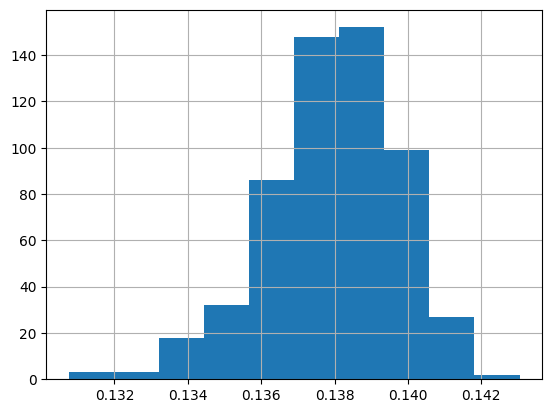

In [100]:
model.predict(cd).reset_index()[0].hist()

In [272]:
brexit = pd.read_csv('data/ge_19_hp_all.csv')

brexit_leave_dict = dict(zip(brexit['ons_const_id'], brexit['leave_hanretty']))
brexit_remain_dict = dict(zip(brexit['ons_const_id'], brexit['remain_hanretty']))

In [273]:
cdf['Leave'] = cdf.pcon_code.map(brexit_leave_dict)
cdf['Remain'] = cdf.pcon_code.map(brexit_remain_dict)

In [31]:

polls_wide

date Proportion_unweighted                                \
demographic                             18_24     25_49     50_64       65+   
0            2020-01-26              0.077291  0.384861  0.255777  0.282072   
1            2020-02-02              0.066007  0.387789    0.2467  0.299505   
2            2020-02-10              0.088394  0.400461  0.262875  0.248271   
3            2020-04-02              0.080515   0.39533  0.252818  0.271337   
4            2020-04-17               0.07599  0.388889  0.254789  0.280332   
..                  ...                   ...       ...       ...       ...   
215          2024-05-22              0.080546  0.408191  0.254608  0.256655   
216          2024-05-24              0.080834  0.404172  0.259452  0.255541   
217          2024-05-28              0.070064  0.393631  0.266242  0.270064   
218          2024-05-30              0.060606  0.379798  0.264646  0.294949   
219          2024-06-04              0.053407  0.381215  0.267649  0.297729   

                                                                         \
demographic      ABC1      C2DE    Female     Leave      Male    Remain   
0            0.622311  0.377689  0.568127  0.433466  0.431873  0.466932   
1            0.627888  0.372112  0.554455  0.420792  0.445545  0.476073   
2            0.605688  0.394312   0.53651  0.441968   0.46349  0.448885   
3            0.608696  0.391304   0.55314  0.455717   0.44686  0.429147   
4            0.621328  0.378672   0.53576  0.441252   0.46424  0.452107   
..                ...       ...       ...       ...       ...       ...   
215          0.620478  0.379522  0.497611  0.374061  0.502389  0.449147   
216          0.638201  0.361799  0.507823  0.361147  0.492177  0.447849   
217          0.625478  0.374522  0.530573  0.378981  0.469427  0.464331   
218          0.616835  0.383165  0.506397  0.394613  0.493603  0.447138   
219          0.636587  0.363413  0.504604  0.400246  0.495396  0.442603   

            Proportion_weighted                                          \
demographic               18_24     25_49     50_64       65+      ABC1   
0                      0.086679  0.381387  0.255474   0.27646  0.613139   
1                      0.102176  0.349101   0.25071  0.298959  0.611164   
2                      0.091616  0.371651  0.266206  0.270527   0.60847   
3                      0.090994   0.38533  0.262767   0.26091  0.611885   
4                      0.091648   0.37694   0.27051  0.261641  0.615669   
..                          ...       ...       ...       ...       ...   
215                    0.082707  0.398496  0.267669  0.251128  0.610526   
216                     0.09551  0.404134  0.256593  0.243763  0.595866   
217                    0.079715  0.409253  0.251246  0.259786  0.600712   
218                    0.086531  0.388262  0.255079  0.270128  0.606471   
219                     0.09822  0.406998  0.246777  0.248005  0.597913   

                                                                Con        \
demographic      C2DE    Female     Leave      Male    Remain 18_24 25_49   
0            0.386861       0.5   0.45073       0.5  0.414234  0.17   0.4   
1            0.389782  0.490066  0.447493  0.509934  0.425733  0.22  0.35   
2             0.39153  0.507347  0.439931  0.492653  0.420052  0.19  0.32   
3            0.388115  0.493036   0.45311  0.506964  0.399257  0.25  0.41   
4            0.384331  0.502587  0.447894  0.497413  0.423503  0.28  0.39   
..                ...       ...       ...       ...       ...   ...   ...   
215          0.389474  0.491729  0.384962  0.508271  0.430827  0.09  0.14   
216          0.404134  0.482537  0.374198  0.517463  0.416964  0.07  0.13   
217          0.399288  0.486833  0.393594  0.513167  0.430605  0.04  0.09   
218          0.393529   0.48909  0.389014  0.510158  0.425132  0.05  0.09   
219          0.402087  0.491713  0.381215  0.508287  0.405157  0.12  0.11   

                                     

In [44]:
polls[[i for i in polls.columns if 'all' not in i.lower()]]

"If there were a general election held tomorrow, which party would you vote for?",date,Con,Lab,Lib Dem,SNP,Plaid Cymru,Reform UK,Green,Other,Unweighted base,Base,demographic,Proportion_unweighted,Proportion_weighted
0,2020-01-26,0.52,0.27,0.1,0.05,0.0,0.02,0.03,0.0,542.0,548.0,Male,0.431873,0.5
1,2020-02-02,0.53,0.26,0.08,0.05,0.0,0.03,0.05,0.0,540.0,539.0,Male,0.445545,0.509934
2,2020-02-10,0.49,0.27,0.09,0.05,0.0,0.03,0.05,0.01,603.0,570.0,Male,0.46349,0.492653
3,2020-04-02,0.54,0.27,0.08,0.04,0.01,0.02,0.04,0.0,555.0,546.0,Male,0.44686,0.506964
4,2020-04-17,0.51,0.3,0.07,0.05,0.01,0.01,0.03,0.02,727.0,673.0,Male,0.46424,0.497413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2024-05-22,0.35,0.26,0.06,0.01,0.0,0.25,0.05,0.02,548.0,512.0,Leave,0.374061,0.384962
216,2024-05-24,0.37,0.24,0.05,0.01,0.01,0.29,0.02,0.02,554.0,525.0,Leave,0.361147,0.374198
217,2024-05-28,0.34,0.29,0.05,0.01,0.01,0.25,0.04,0.02,595.0,553.0,Leave,0.378981,0.393594
218,2024-05-30,0.38,0.23,0.04,0.01,0.01,0.3,0.02,0.01,586.0,517.0,Leave,0.394613,0.389014


In [52]:
polls.demographic.unique()

array(['Male', 'Female', 'ABC1', 'C2DE', '18_24', '25_49', '50_64', '65+',
       'Remain', 'Leave'], dtype=object)

# Estimate joint probabilities for polling data assuming independence 

In [53]:
import itertools

demographics = ['Male', 'Female', 'ABC1', 'C2DE', '18_24', '25_49', '50_64', '65+']

# Create all possible combinations of demographics
combinations = list(itertools.product(demographics, repeat=2))

def get_joint_probabilities(polling_data, combinations, vote_intention_var, proportion_var):
    """
    # Estimate joint probabilities assuming independence
    """
    joint_probabilities = []
    for date in polling_data['date'].unique():
        for comb in combinations:
            if comb[0] != comb[1]:  # Only consider different demographics
                p1 = polling_data[(polling_data['date'] == date) & (polling_data['demographic'] == comb[0])][proportion_var].values[0]
                p2 = polling_data[(polling_data['date'] == date) & (polling_data['demographic'] == comb[1])][proportion_var].values[0]
                joint_probabilities.append({
                    'date': date,
                    'demographic_1': comb[0],
                    'demographic_2': comb[1],
                    'joint_proportion': p1 * p2,
                    'joint_vote_intention': (p1 * polling_data[(polling_data['date'] == date) & (polling_data['demographic'] == comb[0])][vote_intention_var].values[0] +
                                            p2 * polling_data[(polling_data['date'] == date) & (polling_data['demographic'] == comb[1])][vote_intention_var].values[0]) / (p1 + p2)
                })

    joint_prob_df = pd.DataFrame(joint_probabilities)
    
    return joint_prob_df


joint_probs = get_joint_probabilities(polls, combinations, 'Con', 'Proportion_weighted')

In [103]:
joint_probs

,date,demographic_1,demographic_2,joint_proportion,joint_vote_intention
0,2020-01-26,Male,Female,0.250000,0.485000
1,2020-01-26,Male,ABC1,0.306569,0.492459
2,2020-01-26,Male,C2DE,0.193431,0.515638
3,2020-01-26,Male,18_24,0.043339,0.468289
4,2020-01-26,Male,25_49,0.190693,0.468075
...,...,...,...,...,...
12315,2024-06-04,65+,ABC1,0.148285,0.228113
12316,2024-06-04,65+,C2DE,0.099720,0.245779
12317,2024-06-04,65+,18_24,0.024359,0.263262
12318,2024-06-04,65+,25_49,0.100938,0.189513


In [64]:
import statsmodels.api as sm

def estimate_joint_probabilities(joint_prob_df):
    """
    # Create dummy variables for joint demographics
    """
    joint_prob_df_with_dummies = pd.get_dummies(joint_prob_df, columns=['demographic_1', 'demographic_2'], drop_first=True)

    # Add a constant to the model (intercept)
    joint_prob_df_with_dummies = sm.add_constant(joint_prob_df_with_dummies)

    # Define the independent variables (X) and dependent variable (y)
    X = joint_prob_df_with_dummies.drop(columns=['joint_vote_intention', 'joint_proportion', 'date']) * 1
    y = joint_prob_df_with_dummies['joint_vote_intention']

    #return joint_prob_df_with_dummies['joint_proportion']
    # Fit the regression model
    model = sm.OLS(y, X, weights=joint_prob_df_with_dummies['joint_proportion']).fit()

    # Print the model summary
    print(model.summary())

    return model

model = estimate_joint_probabilities(joint_probs)

                             OLS Regression Results                             
Dep. Variable:     joint_vote_intention   R-squared:                      -5.092
Model:                              OLS   Adj. R-squared:                 -5.099
Method:                   Least Squares   F-statistic:                    -734.6
Date:                  Mon, 17 Jun 2024   Prob (F-statistic):               1.00
Time:                          09:16:41   Log-Likelihood:                 12315.
No. Observations:                 12320   AIC:                        -2.460e+04
Df Residuals:                     12305   BIC:                        -2.449e+04
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

/home/zach/miniconda3/envs/keras/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:923: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/home/zach/miniconda3/envs/keras/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


In [108]:
# estimate joint probabilities for all adults 

cd_grouped

,pcon_code,social_grade,age,gender,Observation,total_population,proportion
0,E14000530,ABC1,18-24,Female,985,88300,0.011155
1,E14000530,ABC1,18-24,Male,744,88300,0.008426
2,E14000530,ABC1,25-49,Female,8998,88300,0.101903
3,E14000530,ABC1,25-49,Male,7418,88300,0.084009
4,E14000530,ABC1,50-64,Female,2595,88300,0.029388
...,...,...,...,...,...,...,...
9115,W07000080,C2DE,25-49,Male,10547,88727,0.118870
9116,W07000080,C2DE,50-64,Female,6829,88727,0.076966
9117,W07000080,C2DE,50-64,Male,6246,88727,0.070396
9118,W07000080,C2DE,65+,Female,7018,88727,0.079097


In [109]:
joint_probs

,date,demographic_1,demographic_2,joint_proportion,joint_vote_intention
0,2020-01-26,Male,Female,0.250000,0.485000
1,2020-01-26,Male,ABC1,0.306569,0.492459
2,2020-01-26,Male,C2DE,0.193431,0.515638
3,2020-01-26,Male,18_24,0.043339,0.468289
4,2020-01-26,Male,25_49,0.190693,0.468075
...,...,...,...,...,...
12315,2024-06-04,65+,ABC1,0.148285,0.228113
12316,2024-06-04,65+,C2DE,0.099720,0.245779
12317,2024-06-04,65+,18_24,0.024359,0.263262
12318,2024-06-04,65+,25_49,0.100938,0.189513


In [106]:
# Merge constituency data with joint probabilities
#constituency_data = 

merged_data = pd.merge(cd_grouped, joint_probs, how='left', left_on='social_grade', right_on='demographic_1')
pd.merge(merged_data, polling_data_education, on='education_level', how='left', suffixes=('_age', '_edu'))


,pcon_code,social_grade,age,gender,Observation,total_population,proportion,date,demographic_1,demographic_2,joint_proportion,joint_vote_intention
0,E14000530,ABC1,18-24,Female,985,88300,0.011155,2020-01-26,ABC1,Male,0.306569,0.492459
1,E14000530,ABC1,18-24,Female,985,88300,0.011155,2020-01-26,ABC1,Female,0.306569,0.461016
2,E14000530,ABC1,18-24,Female,985,88300,0.011155,2020-01-26,ABC1,C2DE,0.237200,0.485474
3,E14000530,ABC1,18-24,Female,985,88300,0.011155,2020-01-26,ABC1,18_24,0.053146,0.432842
4,E14000530,ABC1,18-24,Female,985,88300,0.011155,2020-01-26,ABC1,25_49,0.233843,0.443156
...,...,...,...,...,...,...,...,...,...,...,...,...
14044795,W07000080,C2DE,65+,Male,5419,88727,0.061075,2024-06-04,C2DE,ABC1,0.240413,0.194021
14044796,W07000080,C2DE,65+,Male,5419,88727,0.061075,2024-06-04,C2DE,18_24,0.039493,0.184294
14044797,W07000080,C2DE,65+,Male,5419,88727,0.061075,2024-06-04,C2DE,25_49,0.163649,0.154727
14044798,W07000080,C2DE,65+,Male,5419,88727,0.061075,2024-06-04,C2DE,50_64,0.099226,0.215213


In [97]:
joint_probs

,date,demographic_1,demographic_2,joint_proportion,joint_vote_intention
0,2020-01-26,Male,Female,0.250000,0.485000
1,2020-01-26,Male,ABC1,0.306569,0.492459
2,2020-01-26,Male,C2DE,0.193431,0.515638
3,2020-01-26,Male,18_24,0.043339,0.468289
4,2020-01-26,Male,25_49,0.190693,0.468075
...,...,...,...,...,...
12315,2024-06-04,65+,ABC1,0.148285,0.228113
12316,2024-06-04,65+,C2DE,0.099720,0.245779
12317,2024-06-04,65+,18_24,0.024359,0.263262
12318,2024-06-04,65+,25_49,0.100938,0.189513


In [96]:


# wide to long 

cd_grouped#.melt(id_vars=['pcon_code'], value_vars=['Observation', 'total_population', 'proportion'], var_name='variable', value_name='value')

cd_grouped

,pcon_code,social_grade,age,gender,Observation,total_population,proportion
0,E14000530,ABC1,18-24,Female,985,88300,0.011155
1,E14000530,ABC1,18-24,Male,744,88300,0.008426
2,E14000530,ABC1,25-49,Female,8998,88300,0.101903
3,E14000530,ABC1,25-49,Male,7418,88300,0.084009
4,E14000530,ABC1,50-64,Female,2595,88300,0.029388
...,...,...,...,...,...,...,...
9115,W07000080,C2DE,25-49,Male,10547,88727,0.118870
9116,W07000080,C2DE,50-64,Female,6829,88727,0.076966
9117,W07000080,C2DE,50-64,Male,6246,88727,0.070396
9118,W07000080,C2DE,65+,Female,7018,88727,0.079097


In [ ]:
# Create dummy variables for constituency data
constituency_data = pd.get_dummies(constituency_data, columns=['demographic'], drop_first=True)

# Make sure constituency_data has the same dummy columns as the model
missing_cols = set(X.columns) - set(constituency_data.columns)
for col in missing_cols:
    constituency_data[col] = 0

# Reorder columns to match
constituency_data = constituency_data[X.columns]

# Predict vote intention for each demographic group in each constituency
constituency_data['predicted_vote_intention'] = model.predict(constituency_data)

# Aggregate predictions by constituency using the demographic proportions and by date
constituency_predictions = constituency_data.groupby(['constituency', 'date']).apply(
    lambda x: (x['predicted_vote_intention'] * x['proportion']).sum()
).reset_index(name='predicted_vote_intention')

print(constituency_predictions)

In [275]:
polls.loc[polls.demographic == 'Male'][['Con_all', 'Lab_all', 'Lib_dem_all', 'Green_all', 'SNP_all', 'PC_all', 'Reform_all', 'Other_all']]

"If there were a general election held tomorrow, which party would you vote for?",Con_all,Lab_all,Lib_dem_all,Green_all,SNP_all,PC_all,Reform_all,Other_all
0,0.49,0.29,0.1,0.04,0.05,0.01,0.02,0.0
1,0.49,0.3,0.08,0.05,0.04,0.01,0.02,0.01
2,0.48,0.28,0.1,0.06,0.04,0.01,0.02,0.01
3,0.52,0.28,0.08,0.05,0.05,0.01,0.01,0.01
4,0.53,0.32,0.05,0.03,0.04,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...
215,0.21,0.46,0.09,0.07,0.03,0.0,0.12,0.01
216,0.22,0.44,0.09,0.06,0.03,0.01,0.14,0.01
217,0.2,0.47,0.09,0.07,0.03,0.01,0.12,0.02
218,0.21,0.46,0.08,0.06,0.02,0.01,0.15,0.01


In [36]:
polls_wide.set_index('date')['Proportion_weighted'].reset_index()

demographic,date,18_24,25_49,50_64,65+,ABC1,C2DE,Female,Leave,Male,Remain
0,2020-01-26,0.086679,0.381387,0.255474,0.27646,0.613139,0.386861,0.5,0.45073,0.5,0.414234
1,2020-02-02,0.102176,0.349101,0.25071,0.298959,0.611164,0.389782,0.490066,0.447493,0.509934,0.425733
2,2020-02-10,0.091616,0.371651,0.266206,0.270527,0.60847,0.39153,0.507347,0.439931,0.492653,0.420052
3,2020-04-02,0.090994,0.38533,0.262767,0.26091,0.611885,0.388115,0.493036,0.45311,0.506964,0.399257
4,2020-04-17,0.091648,0.37694,0.27051,0.261641,0.615669,0.384331,0.502587,0.447894,0.497413,0.423503
...,...,...,...,...,...,...,...,...,...,...,...
215,2024-05-22,0.082707,0.398496,0.267669,0.251128,0.610526,0.389474,0.491729,0.384962,0.508271,0.430827
216,2024-05-24,0.09551,0.404134,0.256593,0.243763,0.595866,0.404134,0.482537,0.374198,0.517463,0.416964
217,2024-05-28,0.079715,0.409253,0.251246,0.259786,0.600712,0.399288,0.486833,0.393594,0.513167,0.430605
218,2024-05-30,0.086531,0.388262,0.255079,0.270128,0.606471,0.393529,0.48909,0.389014,0.510158,0.425132


In [285]:
X = polls_wide.set_index('date')['Con'].reset_index()
Y1 = polls.loc[polls.demographic == 'Male']['Con_all'].values
Y2 = polls.loc[polls.demographic == 'Male']['Lab_all'].values

In [35]:
polls_wide

date Proportion_unweighted                                \
demographic                             18_24     25_49     50_64       65+   
0            2020-01-26              0.077291  0.384861  0.255777  0.282072   
1            2020-02-02              0.066007  0.387789    0.2467  0.299505   
2            2020-02-10              0.088394  0.400461  0.262875  0.248271   
3            2020-04-02              0.080515   0.39533  0.252818  0.271337   
4            2020-04-17               0.07599  0.388889  0.254789  0.280332   
..                  ...                   ...       ...       ...       ...   
215          2024-05-22              0.080546  0.408191  0.254608  0.256655   
216          2024-05-24              0.080834  0.404172  0.259452  0.255541   
217          2024-05-28              0.070064  0.393631  0.266242  0.270064   
218          2024-05-30              0.060606  0.379798  0.264646  0.294949   
219          2024-06-04              0.053407  0.381215  0.267649  0.297729   

                                                                         \
demographic      ABC1      C2DE    Female     Leave      Male    Remain   
0            0.622311  0.377689  0.568127  0.433466  0.431873  0.466932   
1            0.627888  0.372112  0.554455  0.420792  0.445545  0.476073   
2            0.605688  0.394312   0.53651  0.441968   0.46349  0.448885   
3            0.608696  0.391304   0.55314  0.455717   0.44686  0.429147   
4            0.621328  0.378672   0.53576  0.441252   0.46424  0.452107   
..                ...       ...       ...       ...       ...       ...   
215          0.620478  0.379522  0.497611  0.374061  0.502389  0.449147   
216          0.638201  0.361799  0.507823  0.361147  0.492177  0.447849   
217          0.625478  0.374522  0.530573  0.378981  0.469427  0.464331   
218          0.616835  0.383165  0.506397  0.394613  0.493603  0.447138   
219          0.636587  0.363413  0.504604  0.400246  0.495396  0.442603   

            Proportion_weighted                                          \
demographic               18_24     25_49     50_64       65+      ABC1   
0                      0.086679  0.381387  0.255474   0.27646  0.613139   
1                      0.102176  0.349101   0.25071  0.298959  0.611164   
2                      0.091616  0.371651  0.266206  0.270527   0.60847   
3                      0.090994   0.38533  0.262767   0.26091  0.611885   
4                      0.091648   0.37694   0.27051  0.261641  0.615669   
..                          ...       ...       ...       ...       ...   
215                    0.082707  0.398496  0.267669  0.251128  0.610526   
216                     0.09551  0.404134  0.256593  0.243763  0.595866   
217                    0.079715  0.409253  0.251246  0.259786  0.600712   
218                    0.086531  0.388262  0.255079  0.270128  0.606471   
219                     0.09822  0.406998  0.246777  0.248005  0.597913   

                                                                Con        \
demographic      C2DE    Female     Leave      Male    Remain 18_24 25_49   
0            0.386861       0.5   0.45073       0.5  0.414234  0.17   0.4   
1            0.389782  0.490066  0.447493  0.509934  0.425733  0.22  0.35   
2             0.39153  0.507347  0.439931  0.492653  0.420052  0.19  0.32   
3            0.388115  0.493036   0.45311  0.506964  0.399257  0.25  0.41   
4            0.384331  0.502587  0.447894  0.497413  0.423503  0.28  0.39   
..                ...       ...       ...       ...       ...   ...   ...   
215          0.389474  0.491729  0.384962  0.508271  0.430827  0.09  0.14   
216          0.404134  0.482537  0.374198  0.517463  0.416964  0.07  0.13   
217          0.399288  0.486833  0.393594  0.513167  0.430605  0.04  0.09   
218          0.393529   0.48909  0.389014  0.510158  0.425132  0.05  0.09   
219          0.402087  0.491713  0.381215  0.508287  0.405157  0.12  0.11   

                                     

In [295]:
X = polls_wide.set_index('date')['Proportion_weighted'].reset_index()
Y1 = polls.loc[polls.demographic == 'Male']['Con_all'].values
Y2 = polls.loc[polls.demographic == 'Male']['Lab_all'].values

cols = ['date', '18_24', '25_49', '50_64', '65+', 'ABC1', 'C2DE', 'Female', 'Leave', 'Male', 'Remain']

X.columns = cols

numeric_cols = [i for i in X.columns if 'date' not in i]

# Assign weights based on date (example: more recent dates have higher weight)
X['weights'] = np.linspace(1, 1.3, num=len(X))  # Adjust weights based on your criteria
X = X.set_index('date')


weights_dict = dict(zip(X.index, X['weights']))
X[numeric_cols] = X[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [296]:
X

,18_24,25_49,50_64,65+,ABC1,C2DE,Female,Leave,Male,Remain,weights
date,,,,,,,,,,,
2020-01-26,0.086679,0.381387,0.255474,0.276460,0.613139,0.386861,0.500000,0.450730,0.500000,0.414234,1.000000
2020-02-02,0.102176,0.349101,0.250710,0.298959,0.611164,0.389782,0.490066,0.447493,0.509934,0.425733,1.001370
2020-02-10,0.091616,0.371651,0.266206,0.270527,0.608470,0.391530,0.507347,0.439931,0.492653,0.420052,1.002740
2020-04-02,0.090994,0.385330,0.262767,0.260910,0.611885,0.388115,0.493036,0.453110,0.506964,0.399257,1.004110
2020-04-17,0.091648,0.376940,0.270510,0.261641,0.615669,0.384331,0.502587,0.447894,0.497413,0.423503,1.005479
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,0.082707,0.398496,0.267669,0.251128,0.610526,0.389474,0.491729,0.384962,0.508271,0.430827,1.294521
2024-05-24,0.095510,0.404134,0.256593,0.243763,0.595866,0.404134,0.482537,0.374198,0.517463,0.416964,1.295890
2024-05-28,0.079715,0.409253,0.251246,0.259786,0.600712,0.399288,0.486833,0.393594,0.513167,0.430605,1.297260


In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=123)


weights = X_train.index.map(weights_dict)

X_train = X_train.drop(columns=['weights'])
X_test = X_test.drop(columns=['weights'])


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




reg = xgb.XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', tree_method='gpu_hist')

reg.fit(X_train, y_train, sample_weight=weights)
# test accuracy of model
preds = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 0.040562


In [298]:
cdf['predicted_lab_vote'] = reg.predict(cdf[X.drop(columns=['weights']).columns])

In [299]:
cdf.predicted_lab_vote.describe()

count    570.000000
mean       0.441238
std        0.008921
min        0.389237
25%        0.441449
50%        0.442752
75%        0.443059
max        0.448120
Name: predicted_lab_vote, dtype: float64

In [300]:
cdf

,pcon_code,18_24,25_49,50_64,65+,ABC1,C2DE,Male,Female,Leave,Remain,predicted_lab_vote
0,E14000530,0.092804,0.371730,0.189605,0.155285,0.244321,0.755679,0.496232,0.503768,57.897766,42.102234,0.438678
1,E14000531,0.089205,0.291424,0.215438,0.225226,0.216603,0.783397,0.487946,0.512054,67.796350,32.203650,0.447975
2,E14000532,0.082755,0.321373,0.195694,0.185915,0.384103,0.615897,0.486705,0.513295,38.587800,61.412200,0.442331
3,E14000533,0.087399,0.306054,0.220229,0.215428,0.203068,0.796932,0.493022,0.506978,65.299125,34.700875,0.447975
4,E14000534,0.076850,0.253693,0.230765,0.274600,0.308221,0.691779,0.484078,0.515922,49.701106,50.298894,0.442752
...,...,...,...,...,...,...,...,...,...,...,...,...
565,W07000076,0.093945,0.317187,0.203083,0.195417,0.220297,0.779703,0.485468,0.514532,55.135971,44.864029,0.443130
566,W07000077,0.094473,0.312245,0.209240,0.203453,0.203534,0.796466,0.492780,0.507220,58.939917,41.060083,0.447975
567,W07000078,0.085795,0.302420,0.209650,0.214513,0.286685,0.713315,0.481311,0.518689,52.550670,47.449330,0.442607
568,W07000079,0.099427,0.347714,0.188309,0.156617,0.317640,0.682360,0.481760,0.518240,43.822636,56.177364,0.442471
